# Assignment 3 - Loan Prediction
## ADSP 31008 Data Mining Principles

### Christina Song
### 02-12-2024

In [1]:
# import all necessary packages

%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Step 1: Pre-Processing Data

In [2]:
df = pd.read_csv('loanprediction.csv')
df.head()

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_70479/1391154848.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loanprediction.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [3]:
df.shape

(400000, 32)

#### Based on Metadata:

| Variable | Definition |
|----------|------------|
| X1 | Interest Rate on the loan |
| X2 | A unique id for the loan |
| X3 | A unique id assigned for the borrower |
| X4 | Loan amount requested |
| X5 | Loan amount funded |
| X6| Investor-funded portion of loan |
| X7 | Number of payments (36 or 60) |
| X8 | Loan grade |
| X9 |Loan subgrade |
| X10 | Employer or job title (self-filled) |
| X11 | Number of years employed (0 to 10; 10 = 10 or more) |
| X12 | Home ownership status: RENT, OWN, MORTGAGE, OTHER. |
| X13 | Annual income of borrower |
| X14 | Income verified, not verified, or income source was verified |
| X15 | Date loan was issued | 
| X16 | Reason for loan provided by borrower |
| X17 | Loan category, as provided by borrower |
| X18 | Loan title, as provided by borrower |
| X19 | First 3 numbers of zip code |
| X20 | State of borrower |
| X21 | A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrowerâ€™s self-reported monthly income. |
| X22 | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years |
| X23 | Date the borrower's earliest reported credit line was opened |
| X24 | Number of inquiries by creditors during the past 6 months. |
| X25 | Number of months since the borrower's last delinquency. |
| X26 | Number of months since the last public record. |
| X27 | Number of open credit lines in the borrower's credit file. |
| X28 | Number of derogatory public records |
| X29 | Total credit revolving balance |
| X30 | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. |
|X31 |The total number of credit lines currently in the borrower's credit file |
| X32 |The initial listing status of the loan. Possible values are â€“ W, F |

Before we go ahead with data cleaning, let's replace the variable names.

In [4]:
# Replacing variable names

new_col_names = {
    'X1': 'interest_rate',
    'X2': 'loan_id',
    'X3': 'borrower_id',
    'X4': 'amount_requested',
    'X5': 'amount_funded',
    'X6': 'if_loan',
    'X7': 'num_payments',
    'X8': 'grade',
    'X9': 'subgrade',
    'X10': 'job_title',
    'X11': 'y_employed',
    'X12': 'home_ownership',
    'X13': 'ann_income',
    'X14': 'income_verified',
    'X15': 'date_issued',
    'X16': 'reason',
    'X17': 'category',
    'X18': 'title',
    'X19': '3_zipcode',
    'X20': 'state',
    'X21': 'ratio',
    'X22': 'delinq_days',
    'X23': 'date_opened',
    'X24': 'inquiry_num',
    'X25': 'months_last_delinq',
    'X26': 'months_last_record',
    'X27': 'num_open_credit',
    'X28': 'num_derogatory',
    'X29': 'rev_balance',
    'X30': 'util_rate',
    'X31': 'total_credit_lines',
    'X32': 'initial_status'
}

df.rename(columns=new_col_names, inplace=True)
df.head()

,interest_rate,loan_id,borrower_id,amount_requested,amount_funded,if_loan,num_payments,grade,subgrade,job_title,...,date_opened,inquiry_num,months_last_delinq,months_last_record,num_open_credit,num_derogatory,rev_balance,util_rate,total_credit_lines,initial_status
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   interest_rate       338990 non-null  object 
 1   loan_id             399999 non-null  float64
 2   borrower_id         399999 non-null  float64
 3   amount_requested    399999 non-null  object 
 4   amount_funded       399999 non-null  object 
 5   if_loan             399999 non-null  object 
 6   num_payments        399999 non-null  object 
 7   grade               338730 non-null  object 
 8   subgrade            338730 non-null  object 
 9   job_title           376014 non-null  object 
 10  y_employed          382462 non-null  object 
 11  home_ownership      338639 non-null  object 
 12  ann_income          338972 non-null  float64
 13  income_verified     399999 non-null  object 
 14  date_issued         399999 non-null  object 
 15  reason              123560 non-nul

In [6]:
df.isnull().sum()

interest_rate          61010
loan_id                    1
borrower_id                1
amount_requested           1
amount_funded              1
if_loan                    1
num_payments               1
grade                  61270
subgrade               61270
job_title              23986
y_employed             17538
home_ownership         61361
ann_income             61028
income_verified            1
date_issued                1
reason                276440
category                   1
title                     19
3_zipcode                  1
state                      1
ratio                      1
delinq_days                1
date_opened                1
inquiry_num                1
months_last_delinq    218802
months_last_record    348845
num_open_credit            1
num_derogatory             1
rev_balance                1
util_rate                267
total_credit_lines         1
initial_status             1
dtype: int64

In [7]:
df['job_title'].value_counts()

Teacher                              4222
Manager                              3410
Registered Nurse                     1803
RN                                   1711
Supervisor                           1512
                                     ... 
TVS Administration                      1
Globla Mail                             1
Deluxe Entertainment Services           1
Stanford med Center                     1
Senior Creative Designer/Ad Sales       1
Name: job_title, Length: 187821, dtype: int64

In [8]:
df['state'].value_counts()

CA    62194
NY    34557
TX    31277
FL    26991
IL    15877
NJ    15574
PA    13983
OH    12970
GA    12755
VA    12252
NC    10875
MI     9857
MA     9527
MD     9414
WA     9144
AZ     9134
CO     8417
MN     6907
MO     6434
CT     6175
NV     5594
IN     5449
OR     5171
WI     5000
AL     4993
TN     4970
LA     4770
SC     4731
KY     3756
KS     3640
OK     3546
AR     2971
UT     2959
NM     2190
HI     2124
WV     2064
NH     1923
RI     1758
DC     1267
MT     1188
AK     1108
DE     1072
WY      983
SD      854
MS      828
VT      748
ID        9
NE        8
IA        7
ME        4
Name: state, dtype: int64

The following variables – reason, category, and title - are provided by the borrowers. The job_title variable has 18,7821 different varieties. The reason variable has 27.6K empty rows and it will be difficult to impute since these are free-form answers provided by the borrower.

Borrower ID and Loan ID also don't have much to do with loan interest rate. 

Where the borrower is located may also not have the biggest effect on the loan interest rate. So variables 3_zipcode and state can be dropped as well. 

The variables months_last_delinq and months_last_record are missing majority of the data.

Therefore, we can decide to drop these columns.

In [9]:
# drop columns

drop_list = ['reason', 'category', 'title', 'job_title', 'loan_id', 'borrower_id', 
             'state', '3_zipcode', 'months_last_delinq', 'months_last_record']

for x in drop_list:
    if x in df.columns:
        df.drop(x, axis = 1, inplace=True)

df.head()

,interest_rate,amount_requested,amount_funded,if_loan,num_payments,grade,subgrade,y_employed,home_ownership,ann_income,...,ratio,delinq_days,date_opened,inquiry_num,num_open_credit,num_derogatory,rev_balance,util_rate,total_credit_lines,initial_status
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


Interest Rate is the feature we will be using as our target variable to train our model on. However, we are missing 61,010 rows of data, which is around 15% of our dataset. Because we want our model to be as accurate as possible, we can decide to drop the null values rather than imputing the missing values. 

In [10]:
df.dropna(subset=['interest_rate'], inplace=True)
df.isnull().sum()

interest_rate             0
amount_requested          1
amount_funded             1
if_loan                   1
num_payments              1
grade                 51867
subgrade              51867
y_employed            14795
home_ownership        51960
ann_income            51752
income_verified           1
date_issued               1
ratio                     1
delinq_days               1
date_opened               1
inquiry_num               1
num_open_credit           1
num_derogatory            1
rev_balance               1
util_rate               225
total_credit_lines        1
initial_status            1
dtype: int64

In [11]:
df.shape

(338990, 22)

**Basic clean-up**

In [12]:
df.dropna(subset=['amount_requested'], inplace=True)
df.dropna(subset=['amount_funded'], inplace=True)
df.dropna(subset=['if_loan'], inplace=True)
df.dropna(subset=['income_verified'], inplace=True)
df.dropna(subset=['date_issued'], inplace=True)
df.dropna(subset=['ratio'], inplace=True)
df.dropna(subset=['delinq_days'], inplace=True)
df.dropna(subset=['date_opened'], inplace=True)
df.dropna(subset=['inquiry_num'], inplace=True)
df.dropna(subset=['num_open_credit'], inplace=True)
df.dropna(subset=['num_derogatory'], inplace=True)
df.dropna(subset=['rev_balance'], inplace=True)
df.dropna(subset=['total_credit_lines'], inplace=True)
df.dropna(subset=['initial_status'], inplace=True)

In [13]:
df.isnull().sum()

interest_rate             0
amount_requested          0
amount_funded             0
if_loan                   0
num_payments              0
grade                 51866
subgrade              51866
y_employed            14794
home_ownership        51959
ann_income            51751
income_verified           0
date_issued               0
ratio                     0
delinq_days               0
date_opened               0
inquiry_num               0
num_open_credit           0
num_derogatory            0
rev_balance               0
util_rate               224
total_credit_lines        0
initial_status            0
dtype: int64

In [14]:
df['income_verified'].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: income_verified, dtype: int64

In [15]:
df['income_verified'] = df['income_verified'].apply(lambda x:'Verified' if 'VERIFIED' in x else 'Not Verified')
print(df['income_verified'].value_counts())

Verified        231116
Not Verified    107873
Name: income_verified, dtype: int64


In [16]:
df['is_verified'] = df['income_verified'].apply(lambda x: 1 if x == 'Verified' else 0)
df = df.drop('income_verified', axis = 1)

In [17]:
# make amount-based columns numerical

columns_to_clean = ['amount_requested', 'amount_funded', 'if_loan']

for col in columns_to_clean:
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_70479/2879966933.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype(float)


In [18]:
# convert util_rate to float

df['util_rate'] = df['util_rate'].str.rstrip('%').astype('float') / 100


In [19]:
# convert interest_rate to float

df['interest_rate'] = df['interest_rate'].str.replace('%', '')
df['interest_rate'] = df['interest_rate'].str.replace(',', '').astype(float)

#### Plot to check feature importance

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_70479/1223945084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


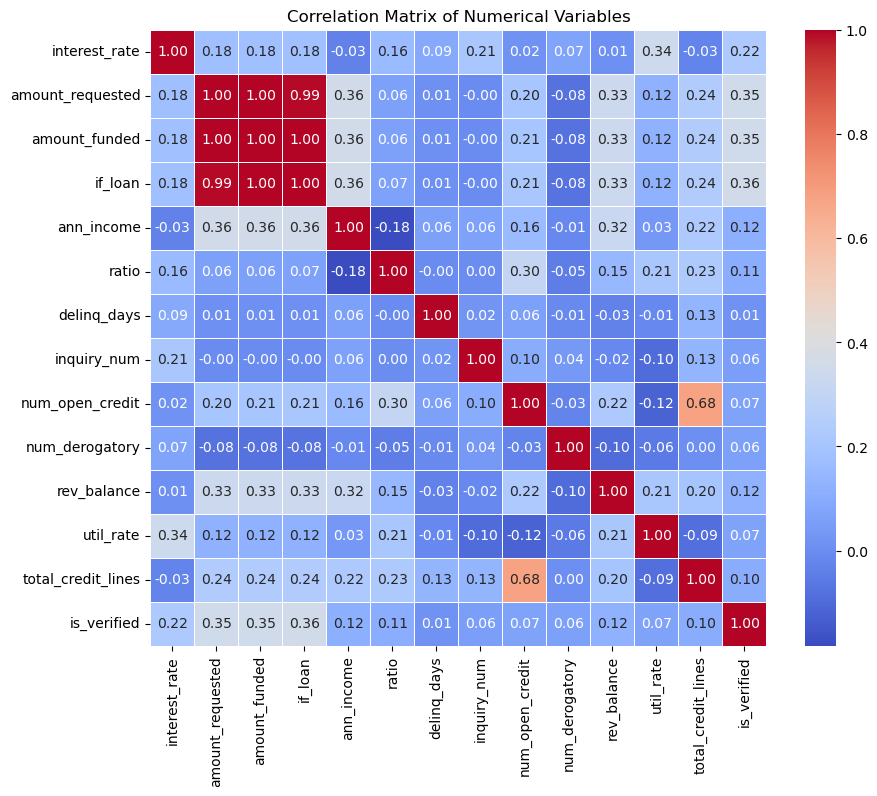

In [20]:
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Based on this correlation matrix, we can decide to keep util_rate, inquiry_num, and is_verified columns as their correlation is greater than 0.2. While the ann_income isn't displaying high correlation with the interest_rate column, we could still keep it since income typically is a strong predictor for loan. 

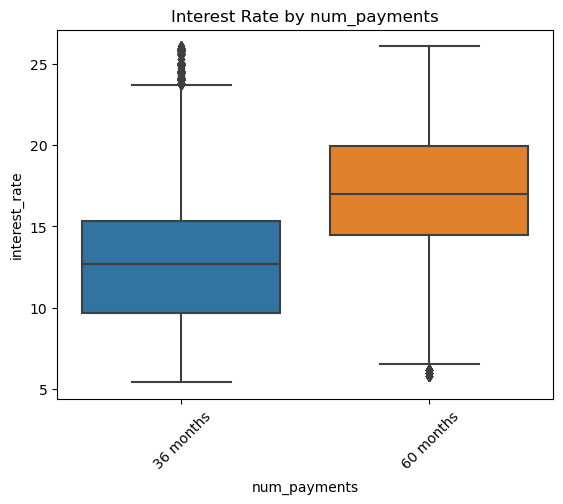

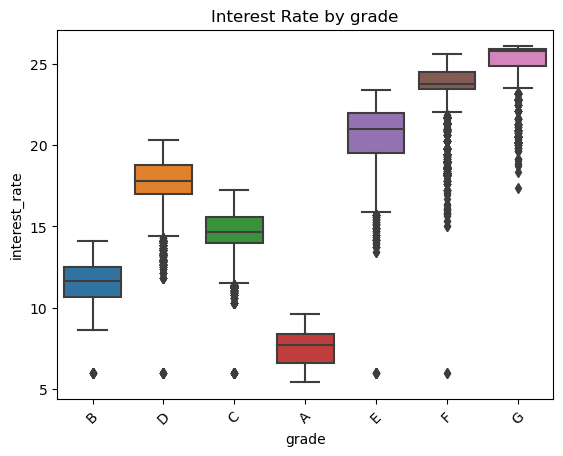

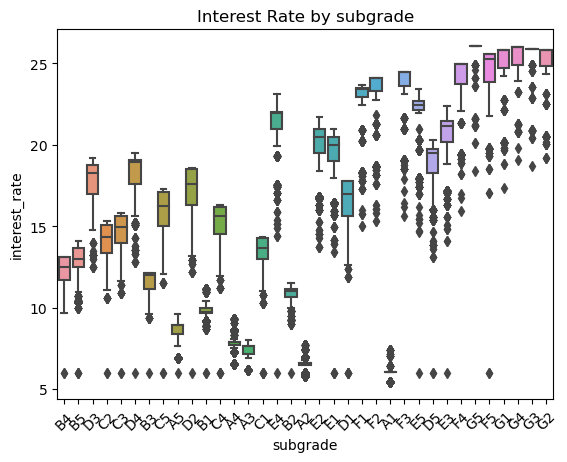

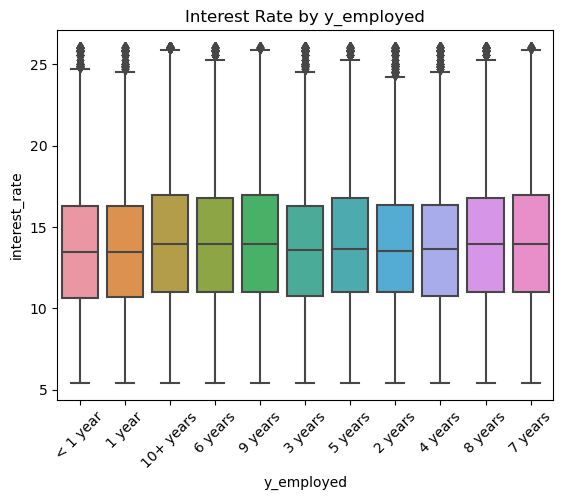

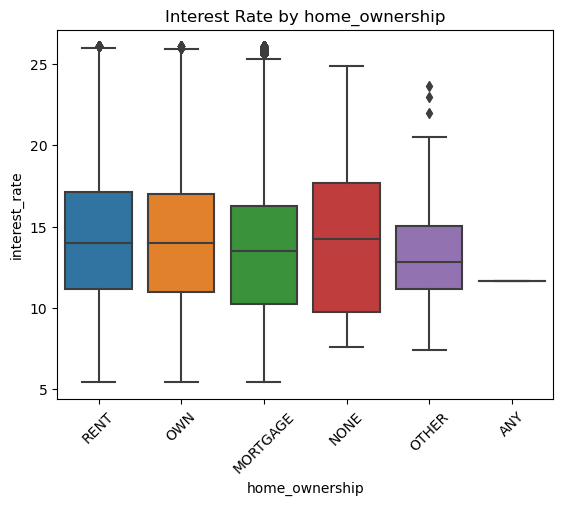

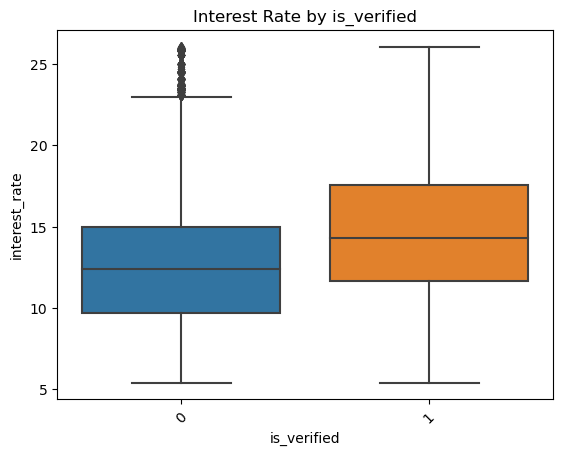

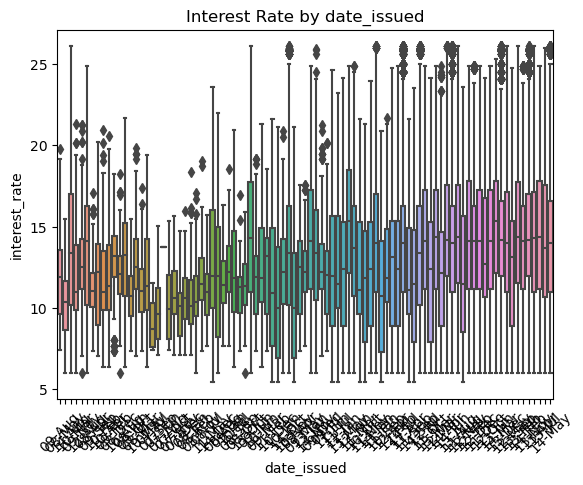

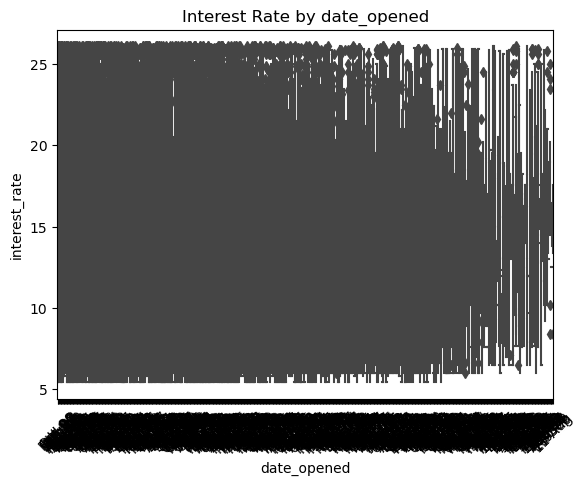

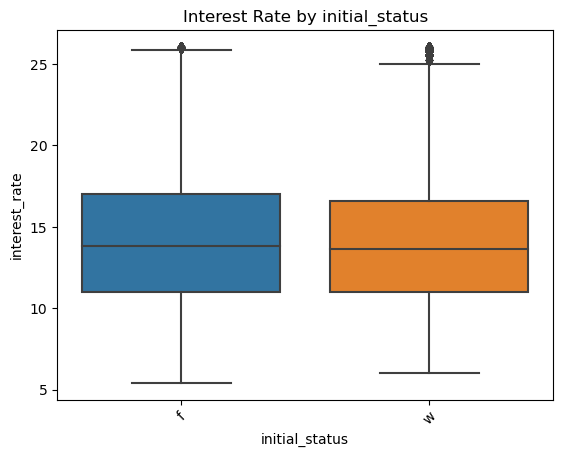

In [21]:
# Plot to see which categorical variables we should keep

cat_vars = ['num_payments', 'grade', 'subgrade', 'y_employed', 'home_ownership', 'is_verified', 'date_issued', 'date_opened', 'initial_status']

for cat_var in cat_vars:
    sns.boxplot(x=cat_var, y='interest_rate', data=df)
    plt.title(f'Interest Rate by {cat_var}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
    plt.show()


In [22]:
df['date_issued'].value_counts()

14-Jul    24797
14-Apr    16175
14-May    16169
14-Aug    15896
14-Jun    14557
          ...  
08-Sep       32
07-Aug       31
07-Jul       27
07-Sep       17
07-Jun        1
Name: date_issued, Length: 91, dtype: int64

Based on the plots for categorical variables, we can conclude that variables initial_status, date_opened, and y_employed aren't as significant in explaining the change in interest rate as other features. Therefore we can drop these two columns. While date_issued seems to have varying results in interest_rate, there are too many outliers and 91 different value types. Based on this information, it may not be the best feature to use as predictor. 

In [23]:
# drop columns

drop_list = ['initial_status', 'date_opened', 'date_issued', 'y_employed']

for x in drop_list:
    if x in df.columns:
        df.drop(x, axis = 1, inplace=True)

df.head()

,interest_rate,amount_requested,amount_funded,if_loan,num_payments,grade,subgrade,home_ownership,ann_income,ratio,delinq_days,inquiry_num,num_open_credit,num_derogatory,rev_balance,util_rate,total_credit_lines,is_verified
0,11.89,25000.0,25000.0,19080.0,36 months,B,B4,RENT,85000.0,19.48,0.0,0.0,10.0,0.0,28854.0,0.521,42.0,1
1,10.71,7000.0,7000.0,673.0,36 months,B,B5,RENT,65000.0,14.29,0.0,0.0,7.0,0.0,33623.0,0.767,7.0,0
2,16.99,25000.0,25000.0,24725.0,36 months,D,D3,RENT,70000.0,10.50,0.0,0.0,10.0,0.0,19878.0,0.663,17.0,1
3,13.11,1200.0,1200.0,1200.0,36 months,C,C2,OWN,54000.0,5.47,0.0,0.0,5.0,0.0,2584.0,0.404,31.0,0
4,13.57,10800.0,10800.0,10692.0,36 months,C,C3,RENT,32000.0,11.63,0.0,1.0,14.0,0.0,3511.0,0.256,40.0,0


Variables grade, subgrade, home_ownership, ann_income, and util_rate are all significant predictors. However, they have a significant amount of missing values. Therefore, we can go ahead and impute missing values with differing techniques. 

Let's first start by plotting a histogram of the variables to decide what the best imputing techniques would be. 

For a deeper dive, let's plot the distribution of the categorical variables. 

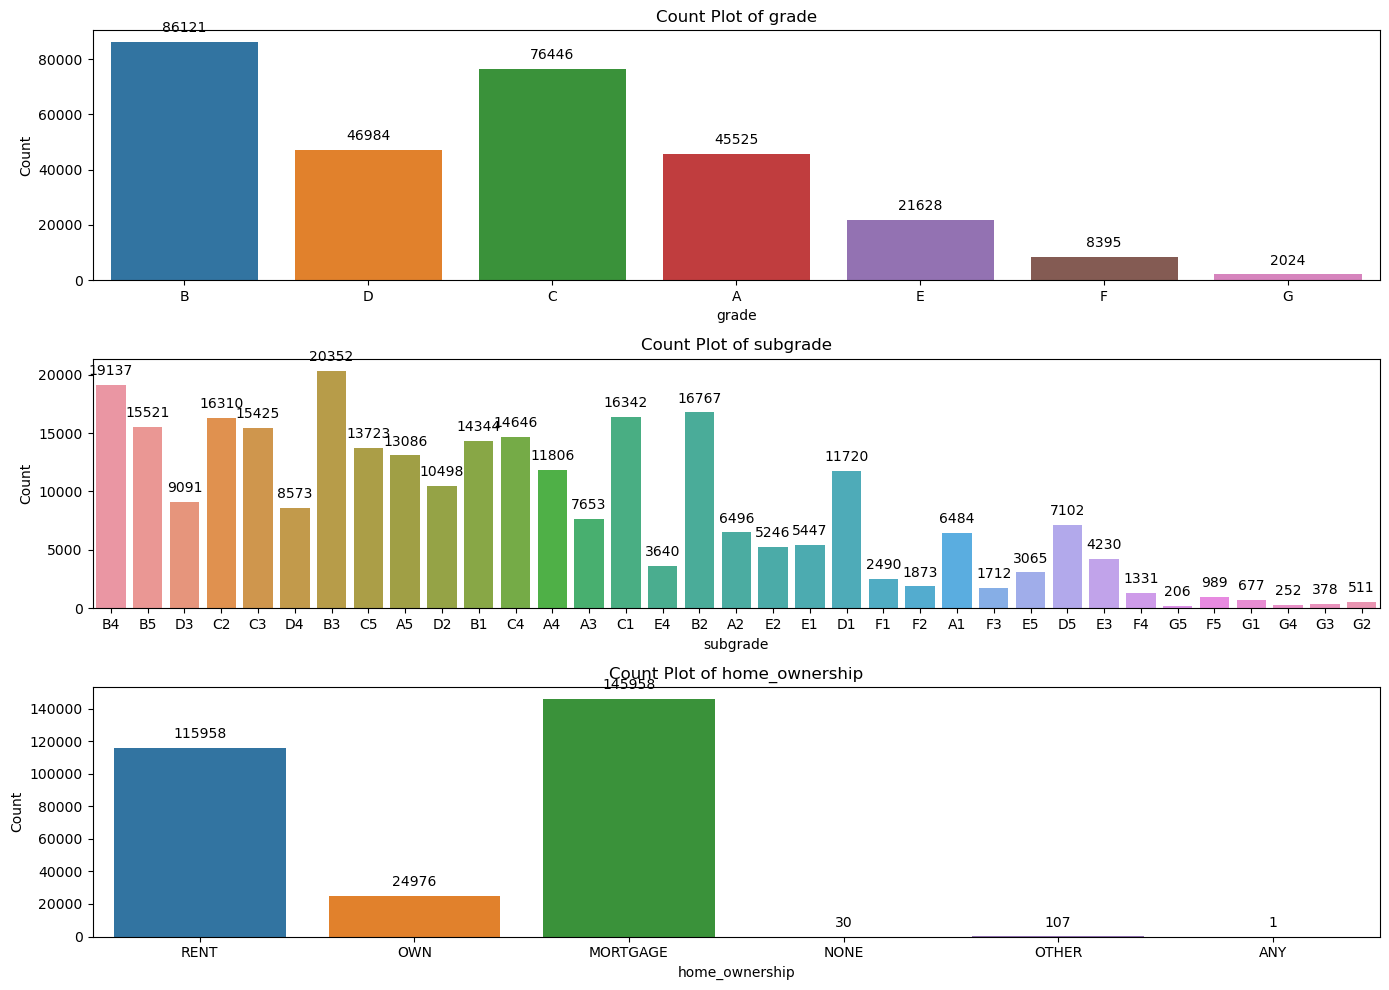

In [24]:
# let's plot categorical variables

variables_cat = ['grade', 'subgrade', 'home_ownership']

plt.figure(figsize=(14, 10)) 

# Loop through the list of categorical variables and create a countplot for each
for i, variable in enumerate(variables_cat):
    plt.subplot(len(variables_cat), 1, i+1) # Creates subplots in a single column
    ax = sns.countplot(x=variable, data=df)
    plt.title(f'Count Plot of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Text to display
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                    ha = 'center',  # Center horizontally
                    va = 'center',  # Center vertically
                    xytext = (0, 10),  # Text offset
                    textcoords = 'offset points')
        
    plt.tight_layout()

plt.show()

Taking a look at the subgrade variable, the grade and subgrade variables are very similar in that subgrade is a break down of the grade variable. It seems unnecessary that we keep both columns. Therefore, we can drop the subgrade column.  

In [25]:
df = df.drop('subgrade', axis = 1)

Variables grade and home_ownership are missing around 15% of its data. 

To impute missing data for 'grade' we can explore what range of interest rate each grade falls under. Then we can fill in any empty 'grade' data with the corresponding range.  

In [26]:
from scipy import stats

# mean, median, mode of the 'grade' feature column
mean_interest_rate = df.groupby('grade')['interest_rate'].mean()
median_interest_rate = df.groupby('grade')['interest_rate'].median()
mode_interest_rate = df.groupby('grade')['interest_rate'].agg(lambda x: stats.mode(x)[0][0] if not x.empty else np.NaN)

# Calculating min and max interest rates for each grade
min_interest_rate = df.groupby('grade')['interest_rate'].min()
max_interest_rate = df.groupby('grade')['interest_rate'].max()

# Creating a summary DataFrame to neatly display all statistics
summary_df = pd.DataFrame({
    'Mean Interest Rate': mean_interest_rate,
    'Median Interest Rate': median_interest_rate,
    'Mode Interest Rate': mode_interest_rate,
    'Min Interest Rate': min_interest_rate,
    'Max Interest Rate': max_interest_rate
})

# Displaying the summary DataFrame
print(summary_df)


       Mean Interest Rate  Median Interest Rate  Mode Interest Rate  \
grade                                                                 
A                7.577277                  7.69                8.90   
B               11.608589                 11.67               10.99   
C               14.794494                 14.64               15.31   
D               17.717614                 17.77               17.57   
E               20.655374                 20.99               18.99   
F               23.606236                 23.76               24.08   
G               25.141532                 25.80               25.80   

       Min Interest Rate  Max Interest Rate  
grade                                        
A                   5.42               9.63  
B                   6.00              14.09  
C                   6.00              17.27  
D                   6.00              20.31  
E                   6.00              23.40  
F                   6.00              

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_70479/1413954053.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_interest_rate = df.groupby('grade')['interest_rate'].agg(lambda x: stats.mode(x)[0][0] if not x.empty else np.NaN)


In [27]:
df.loc[(df['grade'].isnull()) & (df['interest_rate'] < 8), 'grade'] = 'A'
df.loc[(df['grade'].isnull()) & (df['interest_rate'] >= 8) & (df['interest_rate'] < 12), 'grade'] = 'B'
df.loc[(df['grade'].isnull()) & (df['interest_rate'] >= 12) & (df['interest_rate'] < 14), 'grade'] = 'C'
df.loc[(df['grade'].isnull()) & (df['interest_rate'] >= 14) & (df['interest_rate'] < 18), 'grade'] = 'D'
df.loc[(df['grade'].isnull()) & (df['interest_rate'] >= 18) & (df['interest_rate'] < 22), 'grade'] = 'E'
df.loc[(df['grade'].isnull()) & (df['interest_rate'] >= 22) & (df['interest_rate'] < 24.5), 'grade'] = 'F'
df.loc[(df['grade'].isnull()) & (df['interest_rate'] >= 24.5), 'grade'] = 'G'

In [28]:
df['grade'].value_counts()

B    97659
C    86103
D    62412
A    51461
E    28480
F    10056
G     2818
Name: grade, dtype: int64

In [29]:
df['grade'].isnull().sum()

0

For 'home_ownership', we can use random imputer to impute missing data. One thing to keep noted is that the holdout_test dataset doesn't include any, other, and none for 'home_ownership'. When we create dummy variables for this feature, we can drop those three feature columns. 

In [30]:
unique_categories = ['RENT', 'OWN', 'MORTGAGE']

df['home_ownership'] = df['home_ownership'].apply(lambda x: np.random.choice(unique_categories) if pd.isnull(x) else x)

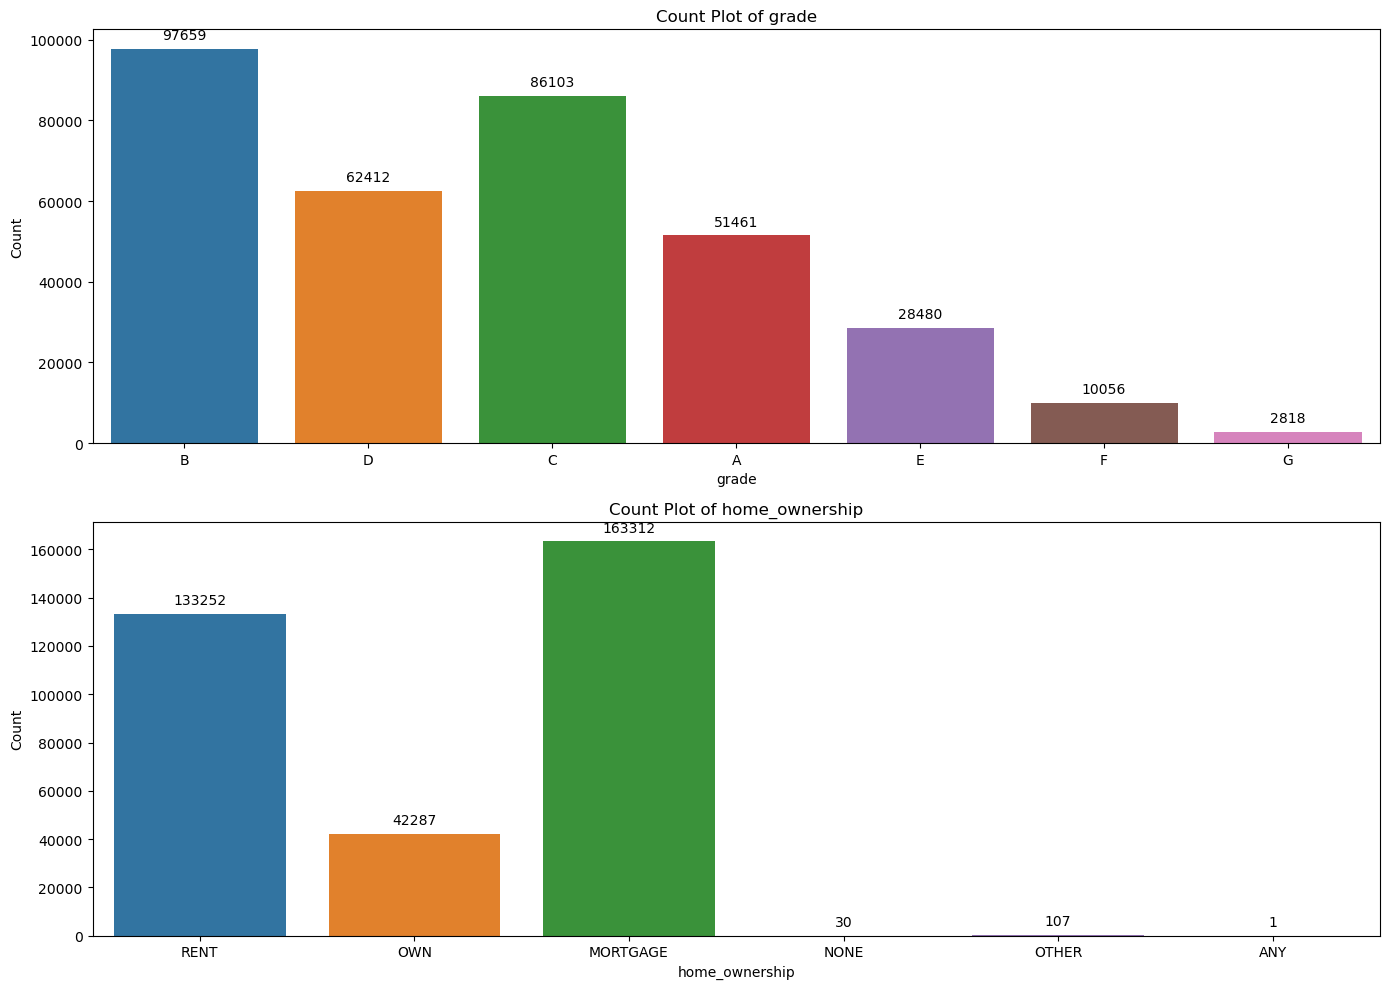

In [31]:
# let's double check by plotting the categorical variables again

variables_cat = ['grade', 'home_ownership']

plt.figure(figsize=(14, 10)) 

# Loop through the list of categorical variables and create a countplot for each
for i, variable in enumerate(variables_cat):
    plt.subplot(len(variables_cat), 1, i+1) # Creates subplots in a single column
    ax = sns.countplot(x=variable, data=df)
    plt.title(f'Count Plot of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # Text to display
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position
                    ha = 'center',  # Center horizontally
                    va = 'center',  # Center vertically
                    xytext = (0, 10),  # Text offset
                    textcoords = 'offset points')
        
    plt.tight_layout()

plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   interest_rate       338989 non-null  float64
 1   amount_requested    338989 non-null  float64
 2   amount_funded       338989 non-null  float64
 3   if_loan             338989 non-null  float64
 4   num_payments        338989 non-null  object 
 5   grade               338989 non-null  object 
 6   home_ownership      338989 non-null  object 
 7   ann_income          287238 non-null  float64
 8   ratio               338989 non-null  float64
 9   delinq_days         338989 non-null  float64
 10  inquiry_num         338989 non-null  float64
 11  num_open_credit     338989 non-null  float64
 12  num_derogatory      338989 non-null  float64
 13  rev_balance         338989 non-null  float64
 14  util_rate           338765 non-null  float64
 15  total_credit_lines  338989 non-nul

Let's use interpolate() to impute missing values for 'ann_income' and 'util_rate'.

In [33]:
df['ann_income'].describe()

count    2.872380e+05
mean     7.315146e+04
std      5.618967e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.807875e+04
max      7.500000e+06
Name: ann_income, dtype: float64

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_70479/2594609310.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  income = sns.distplot(df['ann_income'], kde=True)


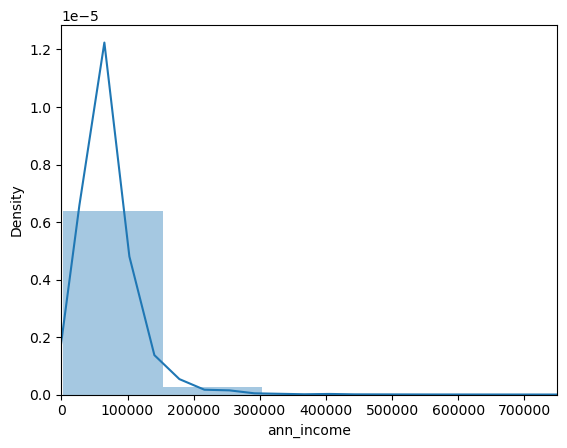

In [34]:
income = sns.distplot(df['ann_income'], kde=True)
income.set_xlim(left=0, right=750000)
plt.show()

In [35]:
df['ann_income'] = df['ann_income'].interpolate()

In [36]:
df['ann_income'].describe()

count    3.389890e+05
mean     7.311117e+04
std      5.369898e+04
min      3.000000e+03
25%      4.600000e+04
50%      6.400000e+04
75%      8.750000e+04
max      7.500000e+06
Name: ann_income, dtype: float64

After imputing missing values for Annual Income with interpolate() function, we can see that the dataset doesn't change much, including the mean and standard deviation values. 

/var/folders/k7/96j2v32x5hzd0cnmry5y_j100000gn/T/ipykernel_70479/2091336060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  util_rate = sns.distplot(df['util_rate'], kde=True)


(0.0, 1.0)

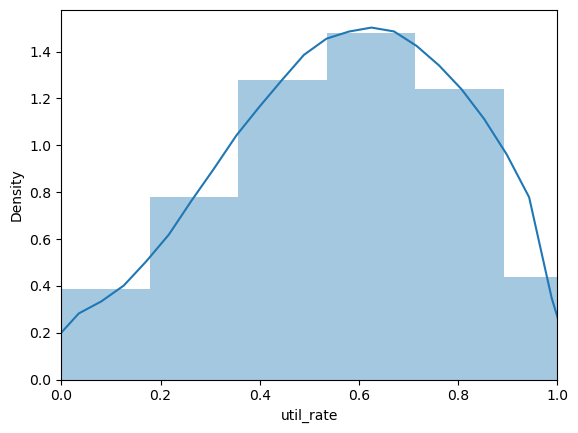

In [37]:
util_rate = sns.distplot(df['util_rate'], kde=True)
util_rate.set_xlim(left=0, right=1)

In [38]:
df['util_rate'].describe()

count    338765.000000
mean          0.563142
std           0.237541
min           0.000000
25%           0.395000
50%           0.579000
75%           0.749000
max           8.923000
Name: util_rate, dtype: float64

In [39]:
df['util_rate'] = df['util_rate'].interpolate()

In [40]:
df['util_rate'].describe()

count    338989.000000
mean          0.563133
std           0.237501
min           0.000000
25%           0.395000
50%           0.579000
75%           0.749000
max           8.923000
Name: util_rate, dtype: float64

Likewise, for the util_rate variable that represents the revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit, we impute the missing values with the interpolate() function. We see that the mean and standard deviation remain similar prior to imputing missing values. 

In [41]:
df.isnull().sum()

interest_rate         0
amount_requested      0
amount_funded         0
if_loan               0
num_payments          0
grade                 0
home_ownership        0
ann_income            0
ratio                 0
delinq_days           0
inquiry_num           0
num_open_credit       0
num_derogatory        0
rev_balance           0
util_rate             0
total_credit_lines    0
is_verified           0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   interest_rate       338989 non-null  float64
 1   amount_requested    338989 non-null  float64
 2   amount_funded       338989 non-null  float64
 3   if_loan             338989 non-null  float64
 4   num_payments        338989 non-null  object 
 5   grade               338989 non-null  object 
 6   home_ownership      338989 non-null  object 
 7   ann_income          338989 non-null  float64
 8   ratio               338989 non-null  float64
 9   delinq_days         338989 non-null  float64
 10  inquiry_num         338989 non-null  float64
 11  num_open_credit     338989 non-null  float64
 12  num_derogatory      338989 non-null  float64
 13  rev_balance         338989 non-null  float64
 14  util_rate           338989 non-null  float64
 15  total_credit_lines  338989 non-nul

In [37]:
df.head()

,interest_rate,amount_requested,amount_funded,if_loan,num_payments,grade,y_employed,home_ownership,ann_income,income_verified,...,ratio,delinq_days,date_opened,inquiry_num,num_open_credit,num_derogatory,rev_balance,util_rate,total_credit_lines,initial_status
0,11.89,"$25,000","$25,000","$19,080",36 months,B,< 1 year,RENT,85000.0,VERIFIED - income,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,0.521,42.0,f
1,10.71,"$7,000","$7,000",$673,36 months,B,< 1 year,RENT,65000.0,not verified,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,0.767,7.0,f
2,16.99,"$25,000","$25,000","$24,725",36 months,D,1 year,RENT,70000.0,VERIFIED - income,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,0.663,17.0,f
3,13.11,"$1,200","$1,200","$1,200",36 months,C,10+ years,OWN,54000.0,not verified,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,0.404,31.0,f
4,13.57,"$10,800","$10,800","$10,692",36 months,C,6 years,RENT,32000.0,not verified,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,0.256,40.0,f


In [ ]:
The columns we'll be using as predictors are:
- num_payments
- grade
- home_ownership
- ann_income
- inquiry_num
- util_rate
- is_verified

In [44]:
predictors = ['num_payments', 'grade', 'home_ownership', 'ann_income', 'inquiry_num', 'util_rate', 'is_verified']
clean_df = df[predictors] 

clean_df.head()

,num_payments,grade,home_ownership,ann_income,inquiry_num,util_rate,is_verified
0,36 months,B,RENT,85000.0,0.0,0.521,1
1,36 months,B,RENT,65000.0,0.0,0.767,0
2,36 months,D,RENT,70000.0,0.0,0.663,1
3,36 months,C,OWN,54000.0,0.0,0.404,0
4,36 months,C,RENT,32000.0,1.0,0.256,0


In [45]:
clean_df = pd.get_dummies(clean_df, columns=['num_payments', 'grade', 'home_ownership'])

In [46]:
clean_df['interest_rate'] = df['interest_rate']
clean_df.head()

,ann_income,inquiry_num,util_rate,is_verified,num_payments_ 36 months,num_payments_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,interest_rate
0,85000.0,0.0,0.521,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,11.89
1,65000.0,0.0,0.767,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10.71
2,70000.0,0.0,0.663,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,16.99
3,54000.0,0.0,0.404,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,13.11
4,32000.0,1.0,0.256,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13.57


Let's drop ANY, NONE, OTHER for home_ownership to match the holdout_test dataset. 

In [78]:
# drop columns

drop_list = ['home_ownership_ANY', 'home_ownership_NONE', 'home_ownership_OTHER']

for x in drop_list:
    if x in clean_df.columns:
        clean_df.drop(x, axis = 1, inplace=True)

clean_df.head()

,ann_income,inquiry_num,util_rate,is_verified,num_payments_ 36 months,num_payments_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,interest_rate
0,85000.0,0.0,0.521,1,1,0,0,1,0,0,0,0,0,0,0,1,11.89
1,65000.0,0.0,0.767,0,1,0,0,1,0,0,0,0,0,0,0,1,10.71
2,70000.0,0.0,0.663,1,1,0,0,0,0,1,0,0,0,0,0,1,16.99
3,54000.0,0.0,0.404,0,1,0,0,0,1,0,0,0,0,0,1,0,13.11
4,32000.0,1.0,0.256,0,1,0,0,0,1,0,0,0,0,0,0,1,13.57


In [79]:
clean_df.shape

(338989, 17)

## Step 2: Building Models

In [80]:
# assigning X features and y target

X, y = clean_df.drop(['interest_rate'], axis=1), clean_df['interest_rate']

In [81]:
y.value_counts()

10.99    11082
12.99     9951
15.61     9869
8.90      9656
7.90      8569
         ...  
16.96        1
16.01        1
24.40        1
16.71        1
18.72        1
Name: interest_rate, Length: 482, dtype: int64

In [82]:
# Importing Classifier Modules

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
# Identify classes with only one member
class_counts = y.value_counts()
single_member_classes = class_counts[class_counts == 1].index

# Filter out rows with these classes
filtered_df = clean_df[~y.isin(single_member_classes)]
X_filtered = filtered_df.drop(columns=['interest_rate']) 
y_filtered = filtered_df['interest_rate']

# Then, perform the train_test_split on the filtered data
train_X, test_X, train_y, test_y = train_test_split(X_filtered, y_filtered, train_size=0.7, test_size=0.3, stratify=y_filtered)

#### Linear Regression for interest_rate

In [84]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [85]:
y_pred_lr = lr.predict(test_X)

# Evaluating the model
lr_mse = mean_squared_error(test_y, y_pred_lr)
lr_r2 = r2_score(test_y, y_pred_lr)

print(f"Mean Squared Error: {lr_mse:.2f}")
print(f"R^2 Score: {lr_r2:.2f}")

Mean Squared Error: 1.68
R^2 Score: 0.91


#### Decision Tree

In [86]:
# train and initiate decision tree

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(train_X, train_y)

DecisionTreeRegressor(random_state=42)

In [87]:
# Making predictions
y_pred_tree = tree_regressor.predict(test_X)

# Evaluate the model
dt_mse = mean_squared_error(test_y, y_pred_tree)
dt_r2 = r2_score(test_y, y_pred_tree)

print(f"Mean Squared Error: {dt_mse:.2f}")
print(f"R^2 Score: {dt_r2:.2f}")


Mean Squared Error: 3.37
R^2 Score: 0.82


#### Random Forest

In [88]:
# random forest

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_regressor.fit(train_X, train_y)


RandomForestRegressor(random_state=42)

In [89]:
# Making predictions
y_pred_forest = rf_regressor.predict(test_X)

# Evaluating the model
rf_mse = mean_squared_error(test_y, y_pred_forest)
rf_r2 = r2_score(test_y, y_pred_forest)

print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R^2 Score: {rf_r2:.2f}")


Mean Squared Error: 1.92
R^2 Score: 0.90


#### Gradient Boosting Machines (GBM)

In [90]:
# Initialize and fit the Gradient Boosting Regressor

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(train_X, train_y)

GradientBoostingRegressor(random_state=42)

In [91]:
# Making predictions
y_pred_gbr = gbr.predict(test_X)

# Evaluating the model
gbr_mse = mean_squared_error(test_y, y_pred_gbr)
gbr_r2 = r2_score(test_y, y_pred_gbr)

print(f"Mean Squared Error: {gbr_mse:.2f}")
print(f"R^2 Score: {gbr_r2:.2f}")

Mean Squared Error: 1.65
R^2 Score: 0.91


#### Function for all classifiers

Instead of defining these one by one, we could also create this function to apply to all classifiers. 

In [92]:
# put all models in a list

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Machines'],
    
    'Mean Squared Error': [lr_mse, dt_mse, rf_mse, gbr_mse],
    
    'R^2': [lr_r2, dt_r2, rf_r2, gbr_r2],
    
})

models.sort_values(by='R^2', ascending=False)
    

,Model,Mean Squared Error,R^2
3,Gradient Boosting Machines,1.651449,0.913840
0,Linear Regression,1.679342,0.912385
2,Random Forest,1.921457,0.899753
1,Decision Tree,3.374890,0.823924


Based on the Mean Squared Error and R^2 scores show that the Gradient Boosting Machines performs the best. Linear Regression as well as Random Forest Models perform pretty well. With a low MSE, we can conclude that GBM's prediction match the actual data. With R^2 of 0.914, GBM explains over 91.4% of the variance in the target variable, making it the most effective model among those listed. 

### Step 3: Test models

In [93]:
holdout_data = pd.read_csv('holdout_test.csv')

In [94]:
holdout_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [95]:
# Replacing variable names

new_col_names = {
    'X1': 'interest_rate',
    'X2': 'loan_id',
    'X3': 'borrower_id',
    'X4': 'amount_requested',
    'X5': 'amount_funded',
    'X6': 'if_loan',
    'X7': 'num_payments',
    'X8': 'grade',
    'X9': 'subgrade',
    'X10': 'job_title',
    'X11': 'y_employed',
    'X12': 'home_ownership',
    'X13': 'ann_income',
    'X14': 'income_verified',
    'X15': 'date_issued',
    'X16': 'reason',
    'X17': 'category',
    'X18': 'title',
    'X19': '3_zipcode',
    'X20': 'state',
    'X21': 'ratio',
    'X22': 'delinq_days',
    'X23': 'date_opened',
    'X24': 'inquiry_num',
    'X25': 'months_last_delinq',
    'X26': 'months_last_record',
    'X27': 'num_open_credit',
    'X28': 'num_derogatory',
    'X29': 'rev_balance',
    'X30': 'util_rate',
    'X31': 'total_credit_lines',
    'X32': 'initial_status'
}

holdout_data.rename(columns=new_col_names, inplace=True)
holdout_data.head()

,interest_rate,loan_id,borrower_id,amount_requested,amount_funded,if_loan,num_payments,grade,subgrade,job_title,...,date_opened,inquiry_num,months_last_delinq,months_last_record,num_open_credit,num_derogatory,rev_balance,util_rate,total_credit_lines,initial_status
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [96]:
holdout_data.isnull().sum()

interest_rate         80000
loan_id                   0
borrower_id               0
amount_requested          0
amount_funded             0
if_loan                   0
num_payments              0
grade                     0
subgrade                  0
job_title              4394
y_employed             4382
home_ownership            0
ann_income                0
income_verified           0
date_issued               0
reason                79985
category                  0
title                     0
3_zipcode                 0
state                     0
ratio                     0
delinq_days               0
date_opened               0
inquiry_num               0
months_last_delinq    38704
months_last_record    66161
num_open_credit           0
num_derogatory            0
rev_balance               0
util_rate                30
total_credit_lines        0
initial_status            0
dtype: int64

**Apply the same cleaning methods to the holdout dataset**

In [97]:
holdout_data['is_verified'] = holdout_data['income_verified'].apply(lambda x: 'Verified' if 'VERIFIED' in x else 'Not Verified')
print(holdout_data['is_verified'].value_counts())

Verified        58027
Not Verified    21973
Name: is_verified, dtype: int64


In [98]:
holdout_data['is_verified'] = holdout_data['income_verified'].apply(lambda x: 1 if x == 'Verified' else 0)
holdout_data = holdout_data.drop('income_verified', axis = 1)

In [99]:
predictors = ['num_payments', 'grade', 'home_ownership', 'ann_income', 'inquiry_num', 'util_rate', 'is_verified']

holdout_df = holdout_data[predictors] 
holdout_df.head()

,num_payments,grade,home_ownership,ann_income,inquiry_num,util_rate,is_verified
0,36 months,C,MORTGAGE,68000.0,1,64.50%,0
1,36 months,A,RENT,110480.0,1,26.20%,0
2,36 months,C,MORTGAGE,86000.0,0,49.90%,0
3,60 months,D,RENT,30000.0,1,43.80%,0
4,60 months,B,MORTGAGE,82500.0,0,41.30%,0


In [100]:
holdout_df = pd.get_dummies(holdout_df, columns=['num_payments', 'grade', 'home_ownership'])

In [101]:
holdout_df['interest_rate'] = holdout_data['interest_rate']

In [102]:
holdout_df['util_rate'] = holdout_df['util_rate'].str.rstrip('%').astype('float') / 100

In [103]:
holdout_df.head()

,ann_income,inquiry_num,util_rate,is_verified,num_payments_ 36 months,num_payments_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,interest_rate
0,68000.0,1,0.645,0,1,0,0,0,1,0,0,0,0,1,0,0,NaN
1,110480.0,1,0.262,0,1,0,1,0,0,0,0,0,0,0,0,1,NaN
2,86000.0,0,0.499,0,1,0,0,0,1,0,0,0,0,1,0,0,NaN
3,30000.0,1,0.438,0,0,1,0,0,0,1,0,0,0,0,0,1,NaN
4,82500.0,0,0.413,0,0,1,0,1,0,0,0,0,0,1,0,0,NaN


In [104]:
holdout_df.isnull().sum()

ann_income                     0
inquiry_num                    0
util_rate                     30
is_verified                    0
num_payments_ 36 months        0
num_payments_ 60 months        0
grade_A                        0
grade_B                        0
grade_C                        0
grade_D                        0
grade_E                        0
grade_F                        0
grade_G                        0
home_ownership_MORTGAGE        0
home_ownership_OWN             0
home_ownership_RENT            0
interest_rate              80000
dtype: int64

In [105]:
holdout_df.dropna(subset=['util_rate'], inplace=True)
holdout_df.isnull().sum()

ann_income                     0
inquiry_num                    0
util_rate                      0
is_verified                    0
num_payments_ 36 months        0
num_payments_ 60 months        0
grade_A                        0
grade_B                        0
grade_C                        0
grade_D                        0
grade_E                        0
grade_F                        0
grade_G                        0
home_ownership_MORTGAGE        0
home_ownership_OWN             0
home_ownership_RENT            0
interest_rate              79970
dtype: int64

In [106]:
X_holdout = holdout_df.drop(['interest_rate'], axis=1)

In [107]:
gbr_y_pred_holdout = gbr.predict(X_holdout)

holdout_df['interest_rate'] = gbr_y_pred_holdout

In [108]:
holdout_df.to_csv('Results from Christina Song.csv', index=False)

In [109]:
loan_results = pd.read_csv('Results from Christina Song.csv')
loan_results.head()

,ann_income,inquiry_num,util_rate,is_verified,num_payments_ 36 months,num_payments_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,interest_rate
0,68000.0,1,0.645,0,1,0,0,0,1,0,0,0,0,1,0,0,14.500464
1,110480.0,1,0.262,0,1,0,1,0,0,0,0,0,0,0,0,1,7.371244
2,86000.0,0,0.499,0,1,0,0,0,1,0,0,0,0,1,0,0,14.102560
3,30000.0,1,0.438,0,0,1,0,0,0,1,0,0,0,0,0,1,16.750215
4,82500.0,0,0.413,0,0,1,0,1,0,0,0,0,0,1,0,0,11.148501
